In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [6]:
# CSV dosyasından veri setini yükle
data = pd.read_csv("DATA/seeds_dataset.txt",sep = "\t", header = None)

In [7]:
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [8]:
# Veri setinden özellikleri ve etiketleri ayır
X = data.drop(7, axis=1).values
y = data[7].values

In [9]:
# Özellikleri standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Diana kümeleme algoritması
def diana(X, k):
    n = X.shape[0]  # Veri noktalarının sayısı
    clusters = [[i] for i in range(n)]  # Başlangıçta her veri noktası bir küme

    while len(clusters) > k:
        max_dist = -1
        merge_i = -1
        merge_j = -1

        # En büyük mesafeyi bul
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = np.linalg.norm(np.mean(X[clusters[i]], axis=0) - np.mean(X[clusters[j]], axis=0))
                if dist > max_dist:
                    max_dist = dist
                    merge_i = i
                    merge_j = j

        # İki kümenin birleştirilmesi
        clusters[merge_i].extend(clusters[merge_j])
        del clusters[merge_j]

    return clusters

In [16]:
# Kümeleme sonuçlarını görselleştirme
def visualize_clusters(X, clusters):
    # Her küme için farklı renkler
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, cluster in enumerate(clusters):
        cluster_points = X[cluster]
        plt.scatter(cluster_points[:, 2], cluster_points[:, 3], c=colors[i], label=f'Cluster {i+1}')

    plt.xlabel('2')
    plt.ylabel('3')
    plt.title('Diana Clustering')
    plt.legend()
    plt.show()

In [17]:
# Diana kümeleme
k = 3  # Küme sayısı
clusters = diana(X_scaled, k)

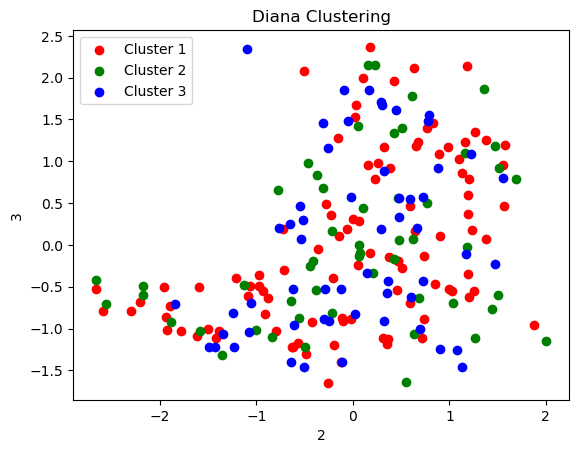

In [18]:
visualize_clusters(X_scaled, clusters)

In [19]:
# Gerçek etiketlerin yüklenmesi
true_labels = data[7]

In [20]:
# Kümeleme sonuçlarının indekslerini yeniden düzenleme
cluster_labels = np.zeros_like(true_labels)
for i, cluster in enumerate(clusters):
    for point_idx in cluster:
        cluster_labels[point_idx] = i

In [21]:
# Ortalama Kare Hatasının hesaplanması
mse = mean_squared_error(true_labels, cluster_labels)
print("Ortalama Kare Hatası:", mse)

Ortalama Kare Hatası: 2.9047619047619047
